# Face detection application using neural network and Keras

- First we import our packages

In [15]:
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from load import load
import numpy as np
%matplotlib inline

- Loading our dataset

In [16]:
x_train, y_train, x_test, y_test, classes = load()
print(classes)
print(x_train.shape)
print(y_train.shape)
print(y_train[0])
print(x_test.shape)
print(y_test.shape)

('ashraf', 'joseph', 'magdy', 'ref', 'sayed', 'Shehab')
(1320, 48, 48, 3)
(1320, 1)
[0]
(330, 48, 48, 3)
(330, 1)


- Making sure that photos have arrived safely

(48, 48, 3)


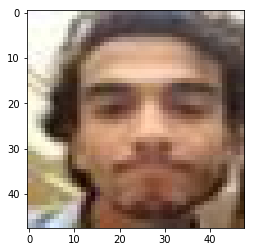

In [17]:
index = 55
print(x_train[index].shape)
plt.imshow((x_train[index]).astype(np.uint8))
plt.show()

- Normalizing data

In [18]:
x_train = x_train / 255
x_test = x_test / 255

- Applying one hot encoding <br>
In a brief one hot encoding is converting category which is a number in our case 
refers to the persons name to something like identity array.

In [25]:
y_train_hot = to_categorical(y_train, num_classes=6)
y_test_hot = to_categorical(y_test, num_classes=6)
print(y_train_hot.shape)
print(y_test_hot.shape)
print(y_train[0])
print(y_train_hot[0])

(1320, 6)
(330, 6)
[0]
[1. 0. 0. 0. 0. 0.]


- Building our model

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(name='first'),
    tf.keras.layers.Dense(6912, activation=tf.nn.tanh, name='second'),

    tf.keras.layers.Dense(3456, activation=tf.nn.tanh, name='third'),
    tf.keras.layers.Dense(1728, activation=tf.nn.tanh, name='fourth'),
    tf.keras.layers.Dense(864, activation=tf.nn.tanh, name='fifth'),
    tf.keras.layers.Dense(432, activation=tf.nn.tanh, name='sixth'),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax, name='seventh')
])


- Compiling our model

In [27]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


- Training our model on training data

In [30]:
model.fit(x_train, y_train_hot, epochs=20, batch_size=50)


Epoch 1/20
1320/1320 [==============================] - 13s 10ms/step - loss: 2.3182 - acc: 0.2265
Epoch 2/20
1320/1320 [==============================] - 11s 8ms/step - loss: 1.7056 - acc: 0.2644
Epoch 3/20
1320/1320 [==============================] - 11s 9ms/step - loss: 1.5466 - acc: 0.3621
Epoch 4/20
1320/1320 [==============================] - 12s 9ms/step - loss: 1.5012 - acc: 0.4386
Epoch 5/20
1320/1320 [==============================] - 12s 9ms/step - loss: 1.5252 - acc: 0.4114
Epoch 6/20
1320/1320 [==============================] - 11s 9ms/step - loss: 1.4116 - acc: 0.4780
Epoch 7/20
1320/1320 [==============================] - 11s 9ms/step - loss: 1.3096 - acc: 0.5280
Epoch 8/20
1320/1320 [==============================] - 12s 9ms/step - loss: 1.3556 - acc: 0.4811
Epoch 9/20
1320/1320 [==============================] - 11s 9ms/step - loss: 1.1410 - acc: 0.5689
Epoch 10/20
1320/1320 [==============================] - 11s 8ms/step - loss: 1.1772 - acc: 0.5697
Epoch 11/20
1320/1

- Testing our model

In [32]:
result = model.evaluate(x_test, y_test_hot)
print('accuracy:', result[1])

330/330 [==============================] - 1s 3ms/step
accuracy: 0.5848484852097251


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Flatten)              (None, 6912)              0         
_________________________________________________________________
second (Dense)               (None, 6912)              47782656  
_________________________________________________________________
third (Dense)                (None, 3456)              23891328  
_________________________________________________________________
fourth (Dense)               (None, 1728)              5973696   
_________________________________________________________________
fifth (Dense)                (None, 864)               1493856   
_________________________________________________________________
sixth (Dense)                (None, 432)               373680    
_________________________________________________________________
seventh (Dense)              (None, 6)                 2598      
Total para